# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x)-((x**2)-2)*numpy.cos(x) -2

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [8]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)

Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [10]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    Dx= (xmax-xmin)/N
    S = 0
    for i in range(0,N+1):
        if i == 0 or i == N:
            S += f(xmin + i*Dx)
        if i != 0 and i != N:
            S += 2*f(xmin + i*Dx)
            S += 4*f(xmin + (i-0.5)*Dx)
    S+= 4*f(xmax-Dx/2)
    return (Dx/6)*S
        
            
    # YOUR CODE HERE
integrate_numeric(0,4,1)

1.6266126028560373

Make sure you have implemented Simpson's rule correctly:

In [39]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [40]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,0,'Value of x')

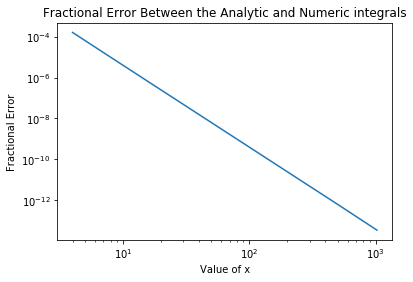

In [33]:
import matplotlib.pyplot as plt
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
Fractional_Error = []
for i in range(len(panel_counts)):
    Fractional_Error.append(1 - integrate_numeric(x0,x1,panel_counts[i])/integrate_analytic(x0,x1))

plt.plot(panel_counts,Fractional_Error)
plt.yscale('log')
plt.xscale('log')
plt.title("Fractional Error Between the Analytic and Numeric integrals")
plt.ylabel("Fractional Error")
plt.xlabel("Value of x")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

At first increasing the number of panels will greatly increase accuracy as the we will be approximating the function as quadratic on smaller intervals meaning our approximation will deviate less from the actual value at each point so our integral will be typically have lower fractional error from the actual value on each panel interval so overall should have a lower fractional error.

Mathematically you can't have too many panels and your approximation will just get better and better but unfortunately computers can only hold numbers with finitely many digits so there is a limit to how accurate we can get. If the number of panels is too large, first of all your program will be very slow but the main issue is rounding. If your N is very large then on each panel interval your $\Delta x$ is going to be extremely tiny, so when calculating $f(x+ i\Delta x)$ for some integer $i$ in the interval $[1,N]$ the value of $x+i\Delta x$ may be rounded such that the actual difference between $x+i\Delta x$ and x is very inaccurate as for example only the last couple of digits or no digits at all may have changed. This means when we add the integral of this panel we will be summing up inaccurate values. Another source of error is that say we are already halfway through calculating our total integral then we will probably have a fairly large value for the sum of our $4f(m_i)\Delta x/6$'s and $2f(x_i)\Delta x/6$'s so far, if $\Delta x$ is too small (so if N is too large) then these values will be very small so we will again have rounding errors when adding them to the total integral so far (the first digit of our value could be in the same position as one of the last digits of the total integral meaning we are in effect only adding it to a few significant figures accuracy. Or worse, the last significant figure of the integral upto that point could be before the first significant figure of the values we're adding, in this case when we add and round the value for the total integral will be unchanged resulting in our sum having bigger error than for smaller N).

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The trapezium rule follows basically the same trend as the Simpsons rule used above however increasing panel count increases accuracy much more slowly.

Much like Simpsons rule, increasing panel count will typically increase accuracy as you decrease your fractional error in your approximation of the function although this time instead of approzimating the function as quadratic on small intervals we are approximating it as straight lines passing through the end points of the intervals. This is typically not as good an approximating as a quadratic curve so accuracy increases more slowly as you increase the number of panels.

With too many panels you get a similar issue to the Simpsons rule, when you are getting towards the end of the integral you will be adding the areas of your panel integrals to the total area of all the other panels. The panel integrals are typically very small compared to the total integral upto that point so when adding them and rounding we lose accuracy as the total effect of adding after  the computer does rounding may be the same as adding the panel integral rounded to only a few significant figures losing precision in our total sum. So too large N can result in large rounding errors.